# "NYC SAT Scores and Correlations"
### By Joseph Mendez

## The Scholastic Aptitude Test, or SAT, is taken by high school students prior to applying for college. Many universities and colleges take SAT test scores into account when making decisions on student admission. The test is divided into 3 parts: Critical Reading, Mathematics, and Writing/Language; each worth 800 points. Districts are often ranked by their high school's average SAT score, with higher scoring districts considered more favorable then districts with lower average test scores. In this project we examine the SAT scores of students from different school districts located within the five boroughs that make up New York City: Manhattan, The Bronx, Queens, Brooklyn, & Staten Island. In this project we will see the correlation between the different demographics of test takers, and their resulted scores.

## Below are links to the datasets we will be working with:


### [SAT Scores by School - SAT Scores for each school in New York City](https://data.cityofnewyork.us/Education/SAT-Results/f9bf-2cp4)

### [School attendance – attendance information on every school in NYC.]( https://data.cityofnewyork.us/Education/School-Attendance-and-Enrollment-Statistics-by-Dis/7z8d-msnt)

### [Math test results – math test results for every school in NYC.]( https://data.cityofnewyork.us/Education/NYS-Math-Test-Results-By-Grade-2006-2011-School-Le/jufi-gzgp)

### [Class size – class size information for each school in NYC.]( https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3)

### [AP test results – Advanced Placement exam results for each high school.]( https://data.cityofnewyork.us/Education/AP-College-Board-2010-School-Level-Results/itfs-ms3e)

### [Graduation outcomes – percentage of students who graduated, and other outcome information.]( https://data.cityofnewyork.us/Education/Graduation-Outcomes-Classes-Of-2005-2010-School-Le/vh2h-md7a)

### [Demographics – demographic information for each school.]( https://data.cityofnewyork.us/Education/School-Demographics-and-Accountability-Snapshot-20/ihfw-zy9j)

### [School district maps – map of the school districts, giving us a better visual presentation of the different districts and different demographics within those school districts.]( https://data.cityofnewyork.us/Education/School-Districts/r8nu-ymqj)




## We will start off by importing our libraries necessary for this project: pandas and numpy. We will also load the files into Jupyter notebook, set-up an empty dictionary, and loop through the files to place each file into the dictionary.

In [3]:
# Import first two necessary libraries.
import pandas as pd
import numpy as np

# Files downloaded that we will be using in this project.
files = ["ap_2010.csv", "class_size.csv", "demographics.csv", "graduation.csv", "hs_directory.csv", "math_test_results.csv", "sat_results.csv"]

# Empty dictionary that we will store our dataframes in.
data = {}

# Loop through each dataframe and place them each into a python dictionary.
for f in files:
    d = pd.read_csv("/Users/joemendez/Desktop/Schools/{0}".format(f))
    data[f.replace(".csv", "")] = d

## Now let's use the head method to print out the first 5 lines of each dataframe:

In [4]:
# Loop to print first five lines of each dataframe using head method.
for k,v in data.items():
    print("\n" + k + "\n")
    print(v.head())


math_test_results

      DBN Grade  Year      Category  Number Tested Mean Scale Score Level 1 #  \
0  01M015     3  2006  All Students             39              667         2   
1  01M015     3  2007  All Students             31              672         2   
2  01M015     3  2008  All Students             37              668         0   
3  01M015     3  2009  All Students             33              668         0   
4  01M015     3  2010  All Students             26              677         6   

  Level 1 % Level 2 # Level 2 % Level 3 # Level 3 % Level 4 # Level 4 %  \
0      5.1%        11     28.2%        20     51.3%         6     15.4%   
1      6.5%         3      9.7%        22       71%         4     12.9%   
2        0%         6     16.2%        29     78.4%         2      5.4%   
3        0%         4     12.1%        28     84.8%         1        3%   
4     23.1%        12     46.2%         6     23.1%         2      7.7%   

  Level 3+4 # Level 3+4 %  
0          26 

## In order to make the datasets easier to work with need to find a corresponding category or "feature" to combine the individual datasets into one dataset to be able to view the contents all at once.

## We can see below that a common feature in each dataframe is labeled as "DBN", which stands for District Borough Number. This is a unique identifier for schools in NYC, and we may be able to use this feature to combine all of our dataframes and make them easier to work with.

In [5]:
# Print out the first five lines of the "demographics" dataframe only printing "DBN" feature.
data["demographics"]["DBN"].head()

0    01M015
1    01M015
2    01M015
3    01M015
4    01M015
Name: DBN, dtype: object

## One of the dataframes we are working with: "class_size", does not have the feature "DBN". Also another dataframe: "hs_directory", has District Borough Number listed as "dbn" not "DBN" like the others. First we will have to find an identifier or indentifiers similar to "DBN" in the "class_size" dataframe to be able to be combined with the others. We will also have to change "dbn" to "DBN" in the "hs_directory" dataframe.

## When we print out the first five lines of the "class_size" dataframe (below), we see that the "DBN" feature is actually "CSD" and "School Code" split into two seperate features. We can combine these two features, convert and label them as "DBN".

In [6]:
# Print out first five lines of "class size" feature using head method.
data["class_size"].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


In [7]:
# Create the "DBN" feature in the "class_size" dataframe by combining: "CSD" & "SCHOOL CODE".
data["class_size"]["DBN"] = data["class_size"].apply(lambda x: "{0:02d}{1}".format(x["CSD"], x["SCHOOL CODE"]), axis=1)

# Assign the "DBN" feature to the "hs_directory" dataframe in place of "dbn".
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

## While looking at the "class_size" dataframe (below) we can see that there is a problem. One school is being represented by multiple rows.

In [8]:
# Print out first five lines of "class size" feature using head method.
data["class_size"].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01M015


## But if we take a look at the "sat_results" dataframe (below), it only has one row per high school.

In [9]:
# Print "sat results" feature using head method.
data["sat_results"].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


## In order to combine these datasets, we will need to find a way to condense dataframes like "class_size" to the point where there is only a single row per high school. If not, there will be no way to compare SAT scores to class size. We can accomplish this by examining the data more closely and reducing the features to ones that only apply to our project. With the "class_size" dataframe, it looks like GRADE and PROGRAM TYPE have multiple values for each school. By restricting each field to a single value, we can filter most of the duplicate rows. In the below code, we:

## Only select values from "class_size" where the "GRADE" field is "09-12".
## Only select values from "class_size" where the "PROGRAM TYPE" field is "GEN ED".
## Group the "class_size" dataframe by "DBN", and take the average of each column. Essentially, we will find the average "class_size" value for each school.
## Reset the index, so "DBN" is added back in as a feature.

In [10]:
# Assign to "class_size" to manipulate dataframe and incorporate "DBN" feature.
class_size = data["class_size"]

# Apply only High School grades (9-12) to "Grade". 
class_size = class_size[class_size["GRADE "] == "09-12"]

# Select only "Gen Ed" programs.
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]


class_size = class_size.groupby("DBN").agg(np.mean)

# Reset index for "class_size".
class_size.reset_index(inplace=True)

# Assign mods to dataframe "class_size".
data["class_size"] = class_size

## Next we will need to condense the demographics dataframe. The data was collected for multiple years from the same schools, so there are duplicate rows for each school. We will only pick rows where the school year field is the most recent available.

In [11]:
# Assign to "demographics" dataframe to lessen scope to one year.
demographics = data["demographics"]

# Assign only most recent school year (2011-2012) to "demographics" dataframe.
demographics = demographics[demographics["schoolyear"] == 20112012]

# Reassign back into dataframe.
data["demographics"] = demographics

## We have to select only one "Year" and one "Grade" from the "math_test_results" dataframe to make our results easier to work with.

In [12]:
# Condense "math_test_results" to a single "Year":(2011) and single "Grade":(8).
data["math_test_results"] = data["math_test_results"][data["math_test_results"]["Year"] == 2011]
data["math_test_results"] = data["math_test_results"][data["math_test_results"]["Grade"] == '8']

## We will also have to do the same with the "graduation" dataframe.

In [13]:
# Condense "graduation" dataframe to a single year: 2006.
data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]

data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]

## Here we are taking the three tests scores that make up the SATs, converting them to a numeric value, and adding them together to make up the total score.

In [15]:
# Assign the three test scores: Math Avg., Reading Avg., and Writing Avg., to "cols".
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']

# Loop through to convert "sat_results" to a numeric value using Pandas' to_numeric function.
for c in cols:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors='coerce')

# Add three scores together to make total score.
data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]

## Now we will loop through the data and see what we have.

In [16]:
# Loop through the data, print first five lines of each feature with head function.
for k,v in data.items():
    print(k)
    print(v.head())

math_test_results
        DBN Grade  Year      Category  Number Tested Mean Scale Score  \
111  01M034     8  2011  All Students             48              646   
280  01M140     8  2011  All Students             61              665   
346  01M184     8  2011  All Students             49              727   
388  01M188     8  2011  All Students             49              658   
411  01M292     8  2011  All Students             49              650   

    Level 1 # Level 1 % Level 2 # Level 2 % Level 3 # Level 3 % Level 4 #  \
111        15     31.3%        22     45.8%        11     22.9%         0   
280         1      1.6%        43     70.5%        17     27.9%         0   
346         0        0%         0        0%         5     10.2%        44   
388        10     20.4%        26     53.1%        10     20.4%         3   
411        15     30.6%        25       51%         7     14.3%         2   

    Level 4 % Level 3+4 # Level 3+4 %  
111        0%          11       22.9%  


## Here we are going to loop through the dictionary; print non-unique DBNs; use a conditional to assign a type of join(inner or outer); then join the items to the dataframe using the feature "DBN".

In [17]:
flat_data_names = [k for k,v in data.items()]
flat_data = [data[k] for k in flat_data_names]
full = flat_data[0]

# Loop through to find non-unique "DBN" features.
for i, f in enumerate(flat_data[1:]): 
    name = flat_data_names[i+1]
    print(name)
    print(len(f["DBN"]) - len(f["DBN"].unique()))
    join_type = "inner"
    
    # Conditional statement to assign inner or outer loop.
    if name in ["sat_results", "ap_2010", "graduation"]:
        join_type = "outer"
    if name not in ["math_test_results"]:
        full = full.merge(f, on="DBN", how=join_type)

full.shape

sat_results
0
demographics
0
graduation
0
hs_directory
0
ap_2010
1
class_size
0


(396, 150)

## Now we have a condensed dataframe that is much easier to work with.

## Later on in this project we are going to examine Advanced Placement (AP) students and the correlation between them and low or high scores. Before we fully examine different demographics and corresponding SAT scores we should make a few final changes to the dataset.

In [18]:
# Assign to 3 features to cols dictionary.
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

# Loop through cols to assign numeric values to features.
for col in cols:
    full[col] = pd.to_numeric(full[col], errors='coerce')

# Fill empty values with 0.
full[cols] = full[cols].fillna(value=0)

## We will also need to calculate a "school_dist" column that indicates the school district of a particular school. This will enable us to match up school districts and plot out district-level statistics.

In [19]:
# Assign "school_dist" column to indicate the school district of the school.
full["school_dist"] = full["DBN"].apply(lambda x: x[:2])

## Finally, we’ll need to fill in any missing values in "full" with the average of each column. This is done to be able to compute correlations more accurately.

In [20]:
# Fill in any missing values with the mean of the column.
full = full.fillna(full.mean())

## Now we will see which columns are correlated with certain features. We can do this with the "corr" method in Pandas. The closer to 0, the weaker the connection. The closer to 1, the stronger the positive correlation, and the closer to -1, the stronger the negative correlation.

In [21]:
# show +1/-1 correlations with "corr" method
full.corr()['sat_score']

Year                                             NaN
Number Tested                           8.127817e-02
SAT Critical Reading Avg. Score         9.868201e-01
SAT Math Avg. Score                     9.726430e-01
SAT Writing Avg. Score                  9.877708e-01
sat_score                               1.000000e+00
schoolyear                                       NaN
frl_percent                            -7.018217e-01
total_enrollment                        3.668201e-01
ell_num                                -1.535745e-01
ell_percent                            -3.981643e-01
sped_num                                3.486852e-02
sped_percent                           -4.413665e-01
asian_num                               4.748801e-01
asian_per                               5.686267e-01
black_num                               2.788331e-02
black_per                              -2.827907e-01
hispanic_num                            2.568811e-02
hispanic_per                           -3.9263

# Now let us plot out the total enrollment of students crossed with the corresponding SAT scores.

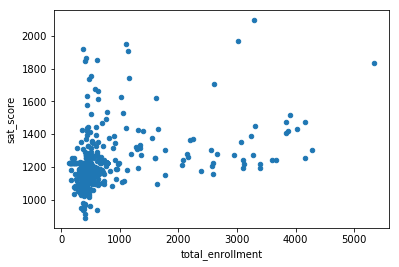

In [23]:
%matplotlib inline
# Plot the x-axis as "total_enrollment" and the y-axis as "sat_score"
full.plot.scatter(x='total_enrollment', y='sat_score')

## We can see  there is a cluster at the bottom left with low total enrollment correlated with low SAT scores. We can explore this further by getting the names of the schools with low enrollment AND low SAT scores:

In [24]:
# Print out low total enrollment schools (<1000) that also have low test scores(<1000).
full[(full["total_enrollment"] < 1000) & (full["sat_score"] < 1000)]["School Name"]

34     INTERNATIONAL SCHOOL FOR LIBERAL ARTS
155      INTERNATIONAL COMMUNITY HIGH SCHOOL
182                                      NaN
183          BRONX INTERNATIONAL HIGH SCHOOL
190    KINGSBRIDGE INTERNATIONAL HIGH SCHOOL
222                                      NaN
225            HIGH SCHOOL OF WORLD CULTURES
233       BROOKLYN INTERNATIONAL HIGH SCHOOL
259    INTERNATIONAL HIGH SCHOOL AT PROSPECT
267               IT TAKES A VILLAGE ACADEMY
282                MULTICULTURAL HIGH SCHOOL
309    PAN AMERICAN INTERNATIONAL HIGH SCHOO
Name: School Name, dtype: object

## These listed schools above are mostly "English Language Learning" schools; which are schools for international students, or students where English is not their primary spoken and read language. It is not the correlation of low enrollment schools equals low scoring schools, it is in fact that these schools have low enrollment due to the fact that they are English as a non-primary language schools, and that the low scoring SAT scores reflect just that. We can look into these English learning schools more to confirm our intuition.

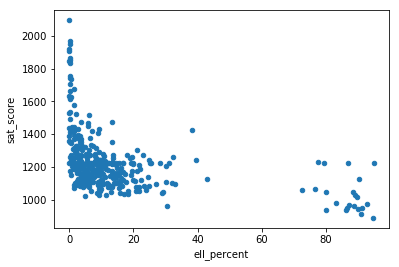

In [40]:
# plot "ell_percent" with "sat_score".
full.plot.scatter(x='ell_percent', y='sat_score')

## We see by the data plotted above that indeed the higher percentages of English languge learners in a school carries lower scores; and in fact the highest scoring schools have a percentage of English language learners near zero.

# Race and SAT Score Correlations
## We will now examine the correlation between race/ethnicity and high or low SAT scores. First we will graph out SAT scores and data corresponding with race/ethnicity.

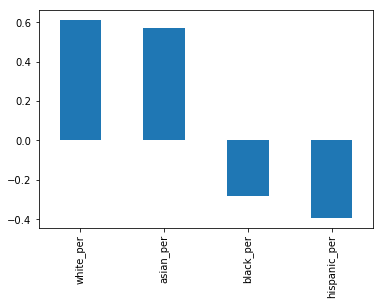

In [32]:
# Bar graph with 4 race/ethnicities.
full.corr()["sat_score"][["white_per", "asian_per", "black_per", "hispanic_per"]].plot.bar()

## We can see by the graph above that schools with a higher percentage of white and Asian students correlated with higher SAT scores, and schools with a higher percentage of black and hispanic students correlated with lower SAT scores.

## Let's plot out the percenatge of hispanic students in a school alongside corresponding SAT scores:

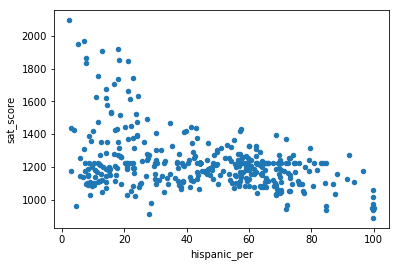

In [33]:
# Scatterplot with percentage of hispanic student attendees.
full.plot.scatter(x='hispanic_per', y='sat_score')

## Indeed as the plot above grows beyond about 25% hispanic attendees the SAT scores level out at 1200 give or take. We can see how the previous graph was correct about the correlation, which is even more visable on this plot.

## Now we will plot out the percentage of white attendees and SAT scores:

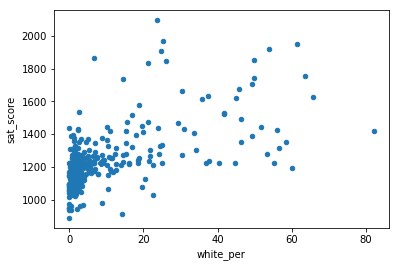

In [34]:
# Scatterplot with percentages of white student attendees.
full.plot.scatter(x='white_per', y='sat_score')

## We can see that when the percentage of white students at a particular school is 15% or lower, the scores are also at a very low average. After about 20% of white student attendees, the scores range well above 1200 to almost perfect in some schools.

## Now we will plot out the black average attending percentages and corresponding SAT scores:

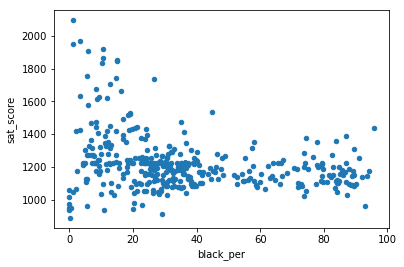

In [35]:
# Scatterplot with percentages of black student attendees.
full.plot.scatter(x='black_per', y='sat_score')

## When the percentage of black students at a particular school is more than 20%, we see that the average SAT score is in between 1000 to 1200, and plateaus there. 

## Let's plot out Asian student attending percentages with correlating SAT scores:

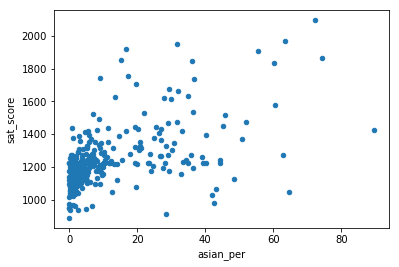

In [36]:
# Scatterplot with percentages of Asian student attendees.
full.plot.scatter(x='asian_per', y='sat_score')

## We can see by the plot above how the higher percentage of Asian students attending a school corresponds with higher test score averages, more so than any other corresponding relationship on this entire project.

# Gender differences in SAT scores

## We can see that there is a definite correlation between race/ethnicity and SAT scores in New York City's five boroughs. Now let 's take a look into correlations between male and female high school attendees and their respective average SAT scores.

## We will first make a bar graph to show negative and positive correlations between male and female test scores.

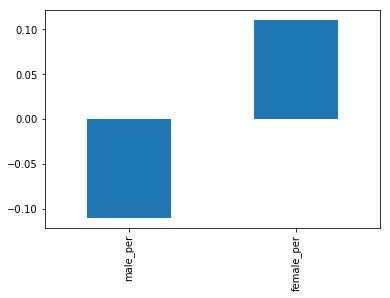

In [27]:
full.corr()["sat_score"][["male_per", "female_per"]].plot.bar()

## We clearly see that a higher percentage of females attending a particular school correlates with higher SAT scores. We can better visualize this with a plot:

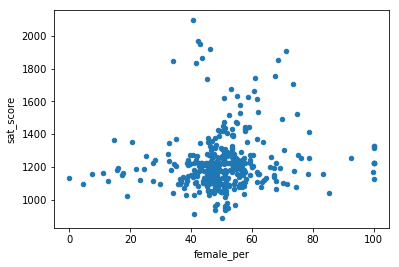

In [43]:
# Plot with female attendance as x-axis and sat score as y-axis
full.plot.scatter(x='female_per', y='sat_score')

## We see in the plot above that schools with 50%-75% female attendees do extremely well on the SATs. There is a cluster of schools in the top right of the plot that represent high test scores and high percentages of female attendees. Let us look into these particular schools to see if there is a specific reason for the correlation.

In [44]:
# Print school with over 65% female attendees AND over a 1400 SAT test score.
full[(full["female_per"] > 65) & (full["sat_score"] > 1400)]["School Name"]

3             PROFESSIONAL PERFORMING ARTS HIGH SCH
83                   BARD HIGH SCHOOL EARLY COLLEGE
103                   ELEANOR ROOSEVELT HIGH SCHOOL
117                    TALENT UNLIMITED HIGH SCHOOL
136            FIORELLO H. LAGUARDIA HIGH SCHOOL OF
321                     TOWNSEND HARRIS HIGH SCHOOL
352    FRANK SINATRA SCHOOL OF THE ARTS HIGH SCHOOL
Name: School Name, dtype: object

## The schools above are elite liberal arts high schools where female attendence is a much higher percentage than average. It seems that it is due to the competitiveness of students at these schools as well as the teaching methods that produce students who accomplish higher SAT scores. The correlation is: elite school equals high SAT scores as opposed to a higher percentage of females attending a school equals higher SAT scores.

## When we use the same parameters for high percentage attended male schools that also have high SAT scores(below), only one high school shows up. But, supporting our theory, it is also an elite science and mathematics driven school.

In [45]:
# Print school with over 65% male attendees AND over a 1400 SAT test score.
full[(full["male_per"] > 65) & (full["sat_score"] > 1400)]["School Name"]

147    HIGH SCHOOL FOR MATHEMATICS  SCIENCE
Name: School Name, dtype: object

# Advanced Placement Students and SAT Scores

## We have looked at correlations between race/ethnicities and SAT scores, as well as the correlation between gender and SAT scores. Now let us examine something more technically driven: the correlation between SAT scores and Advanced Placement students. Advanced Placement classes or "AP" classes are college level classes that accelerated high school students can take while still in high school, and receive college credit for completing these AP courses.

## Let's plot the percentage of AP students in a school and the SAT scores of these students.

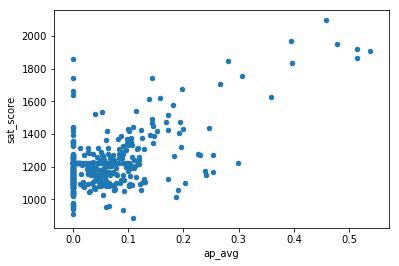

In [46]:
full["ap_avg"] = full["AP Test Takers "] / full["total_enrollment"]

full.plot.scatter(x='ap_avg', y='sat_score')

## We can see from the plot above that indeed the higher percentage of AP students directly corresponds with higher SAT score averages. This would make sense since AP students are already studying college level materials and competing academically at an advanced pace.

## Let's print out the schools with a large percentage of AP students that also have very high SAT scores.

In [47]:
full[(full["ap_avg"] > .3) & (full["sat_score"] > 1700)]["School Name"]

103            ELEANOR ROOSEVELT HIGH SCHOOL
114                   STUYVESANT HIGH SCHOOL
200             BRONX HIGH SCHOOL OF SCIENCE
204    HIGH SCHOOL OF AMERICAN STUDIES AT LE
232           BROOKLYN TECHNICAL HIGH SCHOOL
321              TOWNSEND HARRIS HIGH SCHOOL
341    QUEENS HIGH SCHOOL FOR THE SCIENCES A
364      STATEN ISLAND TECHNICAL HIGH SCHOOL
Name: School Name, dtype: object

##  Examining the schools above, we can see that these are indeed technical mathematics and science based schools, which in fact does result in higher SAT scores The same outcome we saw earlier when liberal arts and science schools were also exhibiting high SAT scores. 


# Final Analysis

## As we wrap up this project we see definite correlations between different races/ethnic groups and SAT scores. We also see that gender does not play much of a role, and that in fact the biggest determination of SAT scores is the status of the school district, particularly the type of high schools within a district. Elite high schools which emphasize science/mathematics as well as liberal arts high schools do extremely well in SAT testing. On the other hand it is the general education high schools that fall behind on the curve. We can say with confidence that a science, arts, and math based high school education is more likely to achieve higher SAT scores, and in turn students of these schools have more doors opened for them and more opportunities to attend elite colleges.